In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Step 1: Setup folders (mimicking the local structure)
import os

folders = ["models", "inputs", "outputs"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("📁 Folder structure created.")


📁 Folder structure created.


In [2]:
# Install necessary libraries
!pip install numpy matplotlib opencv-python pillow trimesh pyrender
!pip install rembg  # for image background removal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.0 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.6 MB/s eta 0:00:00
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-py3-none-any.whl size=1745193 sha256=0a042a16b3707c88e90d1f3cf1573bd7644d3cc5244d95c98fb258eb0185a22a
  Stored in directory: /root/.cache/pip/wheels/2f/37/f5/f88cd3dddf75bc3ce608e44bf8a79078c408bf1f351a50818e
Successfully built PyOpenGL
  Attempting uninstall: PyOpenGL
    Found existing installation: PyOpenGL 3.1.9
    Uninstalling PyOpenGL-3.1.9:
      Successfully uninstalled PyOpenGL-3.1.9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

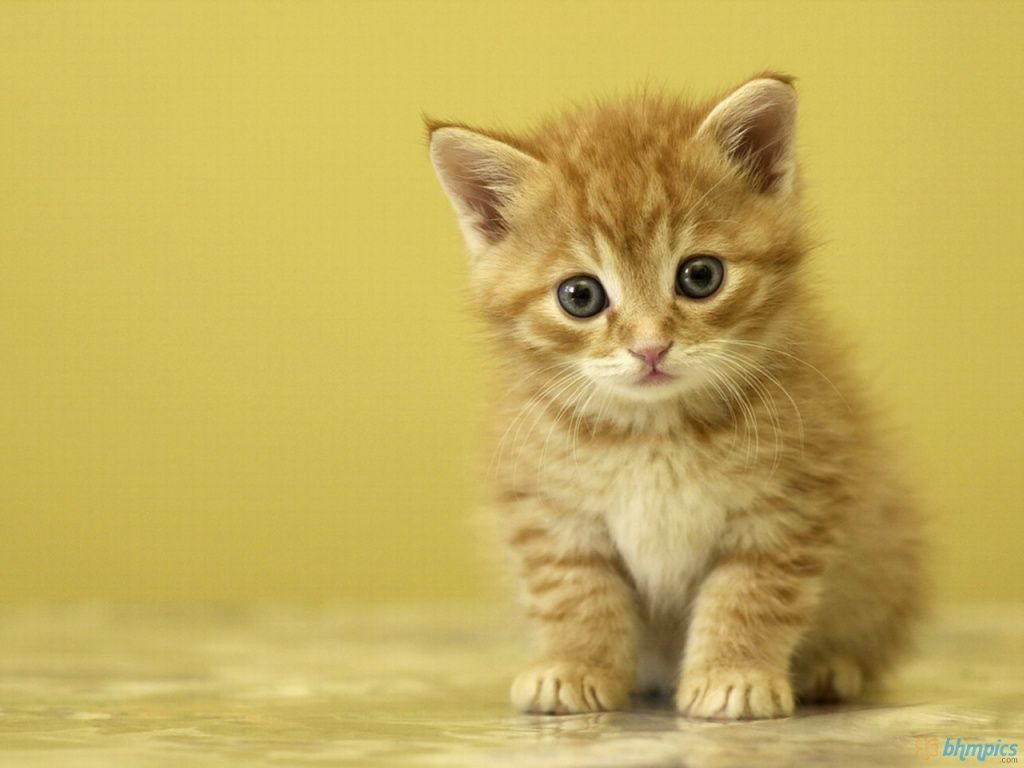

📸 Image copied to /kaggle/working/inputs/my_image.jpg


In [4]:
import shutil
from PIL import Image
from IPython.display import display

# Replace with your actual dataset image path
source_image_path = "/kaggle/input/cat-image/cat.jpg"
destination_image_path = "/kaggle/working/inputs/my_image.jpg"

# Copy image from dataset to working inputs folder
shutil.copy(source_image_path, destination_image_path)

# Load and display the image
image = Image.open(destination_image_path).convert("RGB")
display(image)

print(f"📸 Image copied to {destination_image_path}")


In [6]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 81.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


In [7]:
from rembg import remove
from PIL import Image
import os

# Load original image
input_path = "/kaggle/working/inputs/my_image.jpg"  # use the uploaded filename
output_path = "/kaggle/working/inputs/cat_no_bg.png"

# Remove background
with Image.open(input_path) as img:
    img = img.convert("RGBA")
    result = remove(img)
    result.save(output_path)
    print(f"✅ Background removed. Saved to {output_path}")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 280GB/s]


✅ Background removed. Saved to /kaggle/working/inputs/cat_no_bg.png


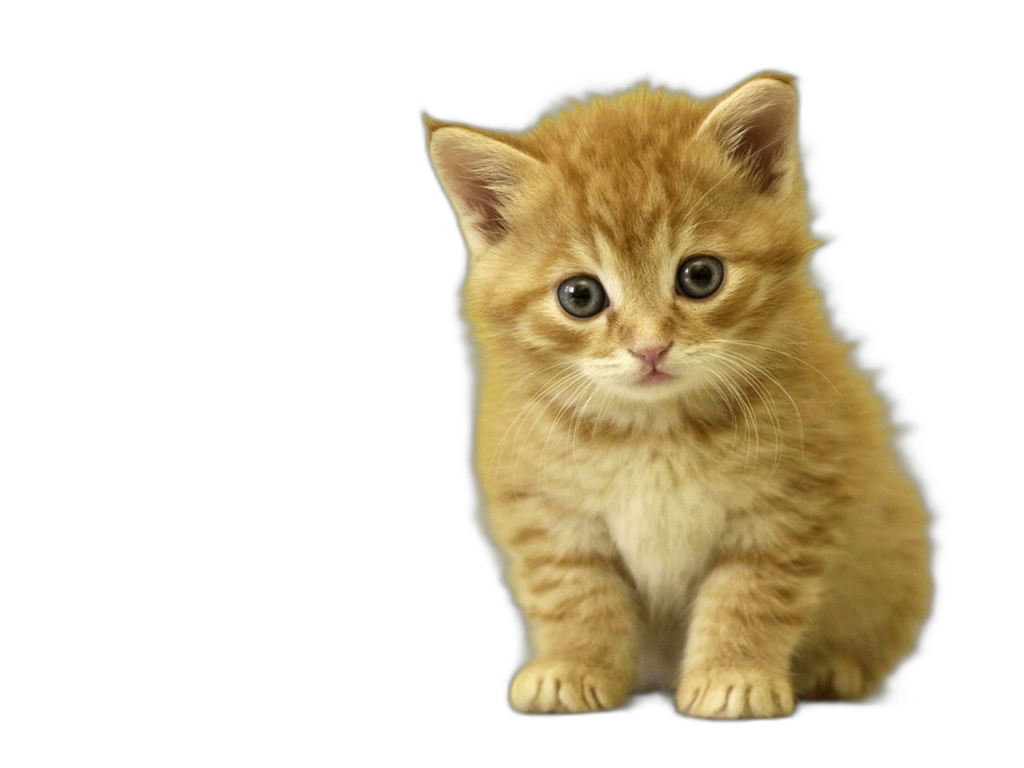

In [8]:
from IPython.display import Image as ColabImage, display
display(ColabImage(filename=output_path))

In [9]:
# Clone the Point-E repo
!git clone https://github.com/openai/point-e.git
%cd point-e

# Install dependencies
!pip install -e .
!pip install scikit-image

Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 57 (delta 4), reused 2 (delta 2), pack-reused 27 (from 1)
Receiving objects: 100% (57/57), 1.57 MiB | 20.30 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/kaggle/working/point-e
Obtaining file:///kaggle/working/point-e
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-pcde0qn_/clip_6510fae681be473383b693f1faba5b6e
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-pcde0qn_/clip_6510fae681be473383b693f1faba5b6e
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
from PIL import Image
import torch
from tqdm.auto import tqdm

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
base_name = 'base40M' # use base300M or base1B for better results
base_model = model_from_config(MODEL_CONFIGS[base_name], device)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('downloading base checkpoint...')
base_model.load_state_dict(load_checkpoint(base_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

creating base model...


100%|███████████████████████████████████████| 890M/890M [00:12<00:00, 73.8MiB/s]


creating upsample model...
downloading base checkpoint...


  0%|          | 0.00/162M [00:00<?, ?iB/s]

downloading upsampler checkpoint...


/kaggle/working/point-e/point_e/models/download.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path, map_location=device)


  0%|          | 0.00/162M [00:00<?, ?iB/s]

<All keys matched successfully>

In [12]:
sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)

In [13]:
# Load an image to condition on.
img = Image.open('/kaggle/working/inputs/cat_no_bg.png')
# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

0it [00:00, ?it/s]

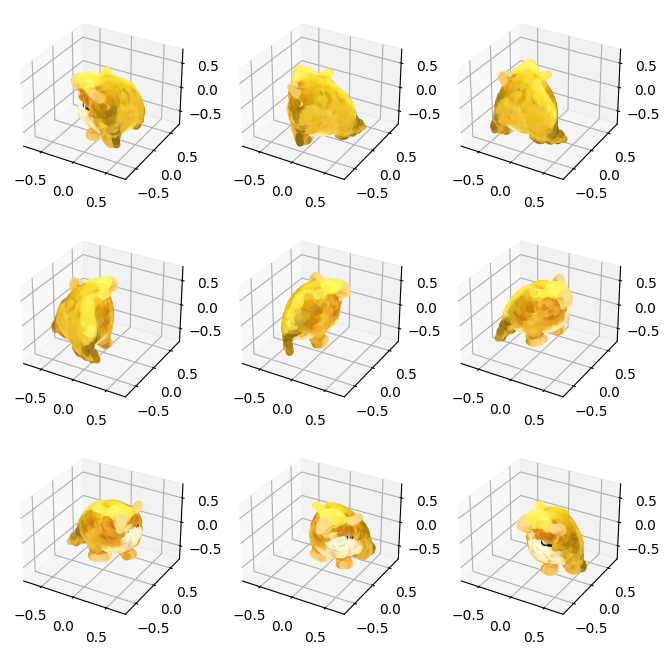

In [14]:
pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.75, -0.75, -0.75),(0.75, 0.75, 0.75)))

In [21]:
print(type(pc))

<class 'point_e.util.point_cloud.PointCloud'>


In [22]:
dir(pc)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'channels',
 'combine',
 'coords',
 'farthest_point_sample',
 'load',
 'nearest_points',
 'random_sample',
 'save',
 'select_channels',
 'subsample',
 'write_ply']

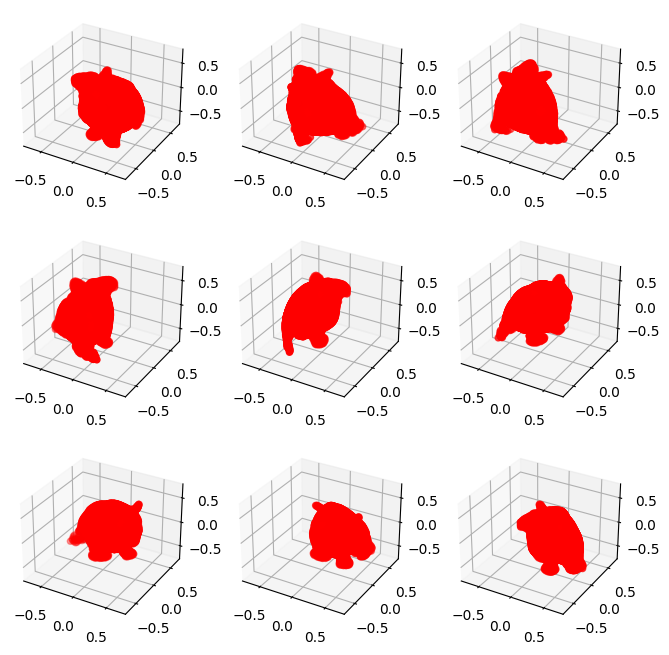

In [24]:
import numpy as np

# Get coordinates (XYZ) from the 'coords' attribute
points = np.array(pc.coords)

# Add RGB color (e.g., red: [1.0, 0.0, 0.0])
colors = np.tile([1.0, 0.0, 0.0], (points.shape[0], 1))  # All points red

# Assign the RGB channels to the 'PointCloud' object
pc.channels["R"] = colors[:, 0]  # Red channel
pc.channels["G"] = colors[:, 1]  # Green channel
pc.channels["B"] = colors[:, 2]  # Blue channel

# Now plot the point cloud with the new colors
fig = plot_point_cloud(
    pc,  # Use the original PointCloud object
    grid_size=3,
    fixed_bounds=((-0.75, -0.75, -0.75), (0.75, 0.75, 0.75))
)


In [25]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 97.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [27]:
import open3d as o3d
import numpy as np
import os

# Ensure outputs directory exists
os.makedirs('/kaggle/working/outputs', exist_ok=True)

# Create Open3D PointCloud object
pcd = o3d.geometry.PointCloud()

# Set coordinates (pc.coords is already a NumPy array)
pcd.points = o3d.utility.Vector3dVector(pc.coords)

# Set colors if available
if 'rgb' in pc.channels:
    pcd.colors = o3d.utility.Vector3dVector(pc.channels['rgb'])

# Save the point cloud to .ply
o3d.io.write_point_cloud("/kaggle/working/outputs/cat_point_cloud.ply", pcd)

print("✅ Point cloud saved to /kaggle/working/outputs/cat_point_cloud.ply")


✅ Point cloud saved to /kaggle/working/outputs/cat_point_cloud.ply


In [30]:
import open3d as o3d
import numpy as np
import os

# Ensure outputs directory exists
os.makedirs('/kaggle/working/outputs', exist_ok=True)

# Create Open3D PointCloud object
pcd = o3d.geometry.PointCloud()

# Set coordinates (pc.coords is already a NumPy array)
pcd.points = o3d.utility.Vector3dVector(pc.coords)

# Set colors if available
if 'rgb' in pc.channels:
    pcd.colors = o3d.utility.Vector3dVector(pc.channels['rgb'])

# Compute normals for the point cloud (needed for surface reconstruction)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

# Surface reconstruction: Convert point cloud to mesh using Poisson reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

# Compute vertex normals for the mesh
mesh.compute_vertex_normals()

# Save the mesh as an STL file
o3d.io.write_triangle_mesh("/kaggle/working/outputs/cat_mesh_fixed.stl", mesh)

print("✅ Fixed STL exported: /kaggle/working/outputs/cat_mesh_fixed.stl")


✅ Fixed STL exported: /kaggle/working/outputs/cat_mesh_fixed.stl


In [33]:
import open3d as o3d
import os

# Assuming you have already generated the mesh object
# For example, this could be from Poisson reconstruction
mesh_output_path = "/kaggle/working/outputs/cat_mesh.obj"

# Ensure output directory exists
os.makedirs(os.path.dirname(mesh_output_path), exist_ok=True)

# Save the mesh (make sure it's a valid mesh object)
o3d.io.write_triangle_mesh(mesh_output_path, mesh)

# Check if file exists now
if os.path.exists(mesh_output_path):
    print(f"✅ Mesh saved successfully at {mesh_output_path}")
else:
    print(f"⚠️ Failed to save the mesh.")


[Open3D WARNING] Write OBJ can not include triangle normals.
✅ Mesh saved successfully at /kaggle/working/outputs/cat_mesh.obj


In [34]:
import os

# Check if the file exists
file_path = "/kaggle/working/outputs/cat_mesh.obj"
if os.path.exists(file_path):
    print(f"✅ File exists: {file_path}")
else:
    print(f"⚠️ File not found: {file_path}")


✅ File exists: /kaggle/working/outputs/cat_mesh.obj


In [40]:
import trimesh

# Load and preview the .obj mesh
mesh = trimesh.load("/kaggle/working/outputs/cat_mesh.obj")
# Set mesh color to red (RGBA)
mesh.visual.vertex_colors = [255, 192, 203, 255] 
mesh.show()  # Opens the mesh preview

In [36]:
# Estimate normals (required before Poisson reconstruction)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

# Poisson surface reconstruction
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

# Save mesh in .obj and .stl formats to Kaggle's working directory
o3d.io.write_triangle_mesh("/kaggle/working/outputs/cat_mesh.obj", mesh)
o3d.io.write_triangle_mesh("/kaggle/working/outputs/cat_mesh.stl", mesh)

print("✅ Mesh saved as .obj and .stl in /kaggle/working/outputs")


[Open3D WARNING] Write STL failed: compute normals first.
✅ Mesh saved as .obj and .stl in /kaggle/working/outputs
